# 关键帧技术

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_theme(style='whitegrid')

In [3]:
def trailing_zeros(r: int):
    ans = 0
    while(not (r & 1)):
        ans += 1
        r = r >> 1
    return ans

In [4]:
assert(trailing_zeros(10) == 1)
assert(trailing_zeros(12) == 2)

In [5]:
storage = [[] for _ in range(0, 64)]
i = 0
n = 10
rk = 6
while len(storage[rk]) < n:
    i += 1
    idx = trailing_zeros(i)
    if idx >= len(storage):
        continue
    storage[idx].append(i)
    while (len(storage[idx]) > n):
        storage[idx].pop(0)

In [6]:
points = []
for i in range(rk):
    points.extend(storage[i])
points = np.array(points)
x = np.arange(np.min(points), np.max(points) + 1)
y = np.zeros(len(x))
for i in range(len(points)):
    y[points[i] - np.min(points)] = trailing_zeros(points[i])

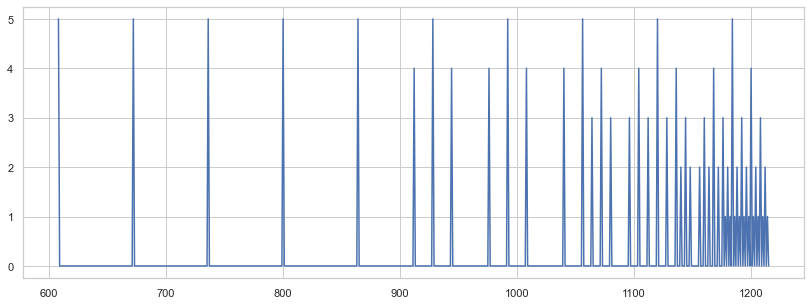

In [7]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(x, y)